In [1]:
import pandas as pd #for data manipulation
import numpy as np #for storing a values in array 
import matplotlib.pyplot as plt #for ploting charts and graphs
import seaborn as sns #for visualisation
from sklearn.model_selection import train_test_split #to split the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler #
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor#for random forest
from sklearn.tree import DecisionTreeRegressor # for decision tree
from sklearn.svm import SVR #for support vector regressor
from sklearn.metrics import mean_absolute_percentage_error  #for validation
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error 
from scipy.stats import norm
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
##reading the csv
df=pd.read_csv('bigmart.csv')
##reading the csv
df_test=pd.read_csv('bigmart_test.csv')

In [2]:
df.shape,df_test.shape

((8523, 12), (5681, 11))

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
print('Skewness: %f' % df['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %df['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


In [6]:
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [7]:
categorial_features = df_test.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1


In [8]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [9]:
numerical_features = df_test.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.75,0.007565,107.8622,1999
1,8.30,0.038428,87.3198,2007


In [10]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
miss_bool = df['Item_Weight'].isnull()
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [13]:
# fill the missing values
item_weight_mean = df_test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
miss_bool = df_test['Item_Weight'].isnull()
for i, item in enumerate(df_test['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i] = np.mean(df_test['Item_Weight'])
outlet_size_mode = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_bool = df_test['Outlet_Size'].isnull()
df_test.loc[miss_bool, 'Outlet_Size'] = df_test.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [14]:
sum(df['Item_Visibility']==0)

526

In [15]:
df_test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [16]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
##for training dataset
df.Item_Fat_Content=df.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
##for testing dataset
df_test.Item_Fat_Content=df_test.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [19]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)
sum(df['Item_Visibility']==0)

0

In [20]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [21]:
## iqr for test dataset
a,b,c=np.percentile(df['Item_Outlet_Sales'],[25,50,75])
a,b,c

(834.2474, 1794.331, 3101.2964)

In [22]:
##1st outlier of training dataset
low=834.2474-1.5*df.std()
##2nd outlier of training dataset
high=3101.2964+1.5*df.std()
def Corr(df,n):
    for i in range(0,len(df)):
        if df[n][i]<low:
            df[n][i]=low
        elif df[n][i]>high:
           df[n][i]=high
        else:
            df[n][i]=df[n][i]
    return df[n]

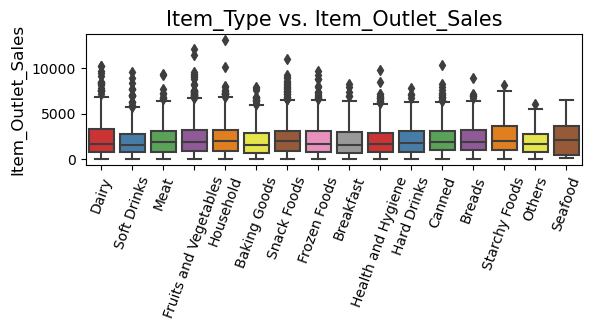

In [23]:
plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Set1")
plt.title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
plt.xlabel("", fontsize=12)
plt.ylabel("Item_Outlet_Sales", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=70)
plt.show()

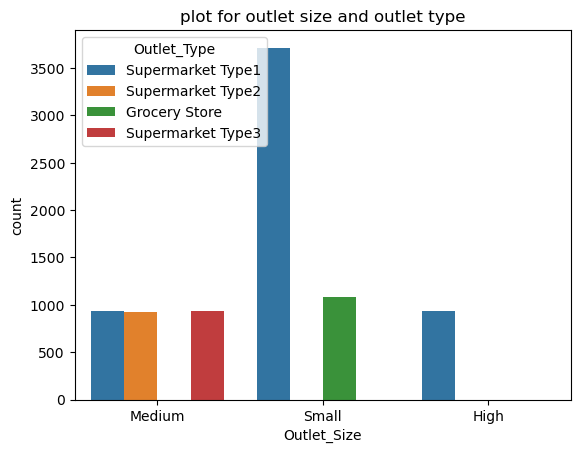

In [24]:
sns.countplot (x='Outlet_Size',data=df,hue='Outlet_Type')
plt.title('plot for outlet size and outlet type')
plt.xlabel('Outlet_Size')
plt.ylabel('count')
plt.show()

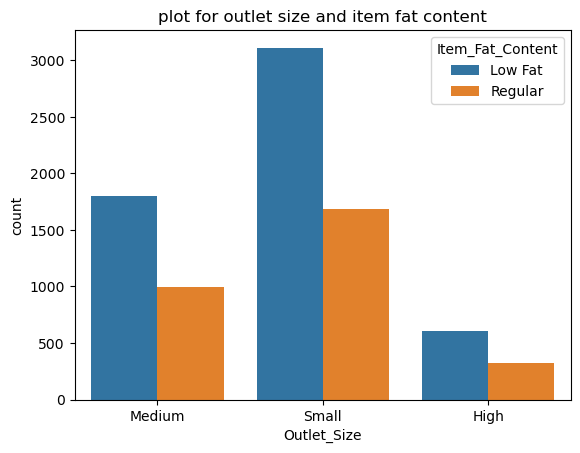

In [25]:
sns.countplot (x='Outlet_Size',data=df,hue='Item_Fat_Content')
plt.title('plot for outlet size and item fat content')
plt.xlabel('Outlet_Size')
plt.ylabel('count')
plt.show()

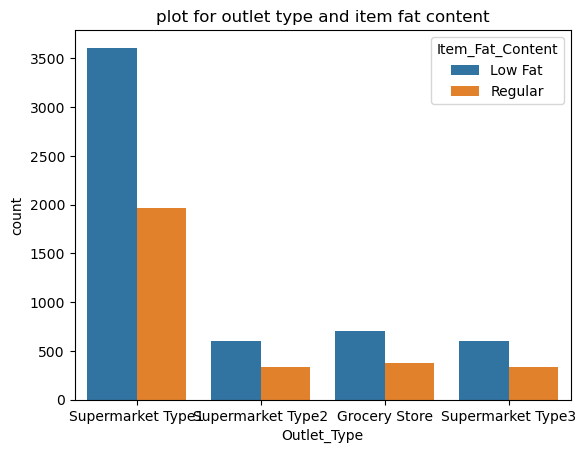

In [26]:
sns.countplot (x='Outlet_Type',data=df,hue='Item_Fat_Content')
plt.title('plot for outlet type and item fat content')
plt.xlabel('Outlet_Type')
plt.ylabel('count')
plt.show()

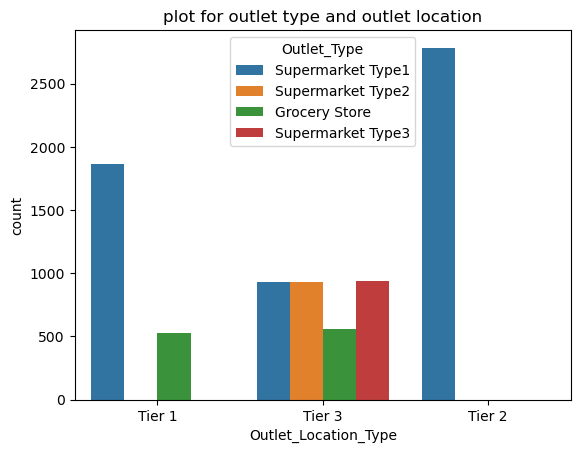

In [27]:
sns.countplot (hue='Outlet_Type',data=df,x='Outlet_Location_Type')
plt.title('plot for outlet type and outlet location')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('count')
plt.show()

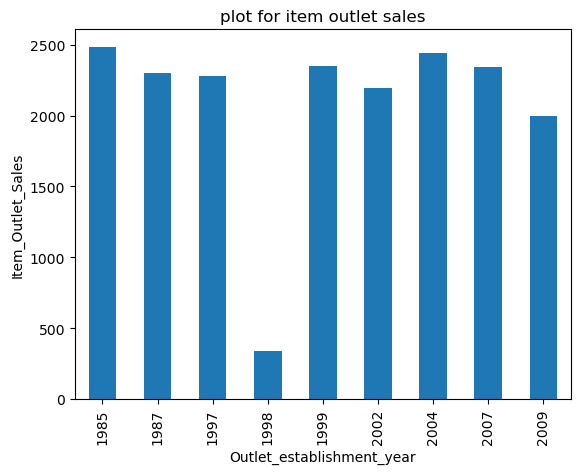

In [28]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.title('plot for item outlet sales')
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Outlet_establishment_year')
plt.show()

<AxesSubplot:>

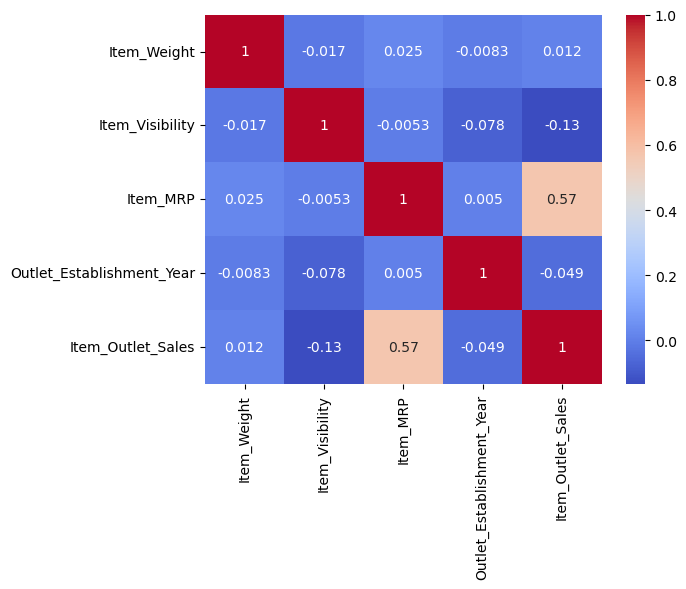

In [29]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [30]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df_test=pd.get_dummies(df_test,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df=df.drop(columns=['Item_Identifier'])
df_test=df_test.drop(columns=['Item_Identifier'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Establishment_Year        5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 5   Item_Fat_Content_Regular         5681 non-null   uint8  
 6   Item_Type_Baking Goods           5681 non-null   uint8  
 7   Item_Type_Breads                 5681 non-null   uint8  
 8   Item_Type_Breakfast              5681 non-null   uint8  
 9   Item_Type_Canned                 5681 non-null   uint8  
 10  Item_Type_Dairy                  5681 non-null   uint8  
 11  Item_Type_Frozen Foods           5681 non-null   uint8  
 12  Item_Type_Fruits and

In [33]:
##spliting on dataset
x=df.drop(columns='Item_Outlet_Sales')
y=df['Item_Outlet_Sales']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20)
##minmax scaler
mx=MinMaxScaler()
pd.DataFrame(mx.fit_transform(x_test))

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.474790,0.331418,0.590721,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.318427,0.187439,0.846434,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.300720,0.207571,0.561113,0.791667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.552821,0.032081,0.317483,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.178571,0.169393,0.105745,0.791667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.227491,0.144005,0.322748,0.708333,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1701,0.660864,0.209543,0.655046,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1702,0.194178,0.486786,0.523967,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1703,0.496257,0.071012,0.089793,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
##liner regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
Lpred=lr.predict(x_test)

##Random Forest model
rf=RandomForestRegressor(n_estimators=200,max_depth=4,max_features=5,criterion='absolute_error')
rf.fit(x_train,y_train)
Rpred=rf.predict(x_test)

##Adaboost model
ad=AdaBoostRegressor(n_estimators=50,learning_rate=0.07,loss='linear')
ad.fit(x_train,y_train)
Apred=ad.predict(x_test)

## support vector
svr = SVR(kernel='linear')  
svr.fit(x_train, y_train)
Spred=svr.predict(x_test)

##decision tree
DTR=DecisionTreeRegressor(max_depth=4,max_features=5,criterion='squared_error')
DTR.fit(x_train,y_train)
Dpred=DTR.predict(x_test)
Dpred

array([2032.07843659, 2032.07843659, 2478.56427051, ..., 2998.09021672,
        341.29212091, 2449.56108531])

In [35]:
gbr=GradientBoostingRegressor(n_estimators=50,learning_rate=0.057,max_features=7 )
gbr.fit(x_train,y_train)
Gpred=gbr.predict(x_test)    
Gpred

array([2655.5854842 , 2833.18720762, 2670.63286496, ..., 2360.00332058,
        341.4439182 , 2996.54373067])

In [36]:
Lpred

array([ 2683.96891913,  3631.96914722,  2730.97750213, ...,
        2629.51288101, -1072.38232768,  3327.78245236])

In [37]:
Rpred

array([2151.069969 , 2206.4861675, 2328.881846 , ..., 2231.315514 ,
        520.5973425, 2361.0050315])

In [38]:
Apred

array([3256.50251699, 3716.5032897 , 2576.49398549, ..., 2525.64932867,
        710.09151814, 3548.02487396])

In [39]:
Spred

array([2413.08093595, 3286.23049628, 2465.02623125, ..., 2464.25185462,
       -303.76951723, 2993.41776435])

In [40]:
print("RMSE:",sqrt(mean_squared_error(y_test,Lpred)))
print("RMSE:",sqrt(mean_squared_error(y_test,Rpred)))
print("RMSE:",sqrt(mean_squared_error(y_test,Dpred)))
print("RMSE:",sqrt(mean_squared_error(y_test,Apred)))
print("RMSE:",sqrt(mean_squared_error(y_test,Spred)))
print("RMSE:",sqrt(mean_squared_error(y_test,Gpred)))

RMSE: 1145.6285025751677
RMSE: 1364.8590135647203
RMSE: 1529.3657918258082
RMSE: 1150.815175630948
RMSE: 1219.269462382265
RMSE: 1239.951716620963


In [41]:
print("r2:",r2(y_test,Lpred))
print("r2:",r2(y_test,Rpred))
print("r2:",r2(y_test,Dpred))
print("r2:",r2(y_test,Apred))
print("r2:",r2(y_test,Spred))
print("r2:",r2(y_test,Gpred))

r2: 0.5530524700232891
r2: 0.3656272697562667
r2: 0.20348920694992223
r2: 0.5489963238940098
r2: 0.4937461783444438
r2: 0.47642552044129194


In [42]:
print("MAPE:",mean_absolute_percentage_error(y_test,Lpred))
print("MAPE:",mean_absolute_percentage_error(y_test,Rpred))
print("MAPE:",mean_absolute_percentage_error(y_test,Dpred))
print("MAPE:",mean_absolute_percentage_error(y_test,Apred))
print("MAPE:",mean_absolute_percentage_error(y_test,Spred))
print("MAPE:",mean_absolute_percentage_error(y_test,Gpred))

MAPE: 1.0283083162225815
MAPE: 0.8454087350784396
MAPE: 0.9909922915211159
MAPE: 0.8482493052593378
MAPE: 0.868347644535405
MAPE: 0.8369998449540104


In [48]:
##final training
ad.fit(x,y)
t=ad.predict(df_test)
t

array([1681.75161778, 1253.83101147,  575.05020377, ..., 2009.40158194,
       3675.2070861 , 1164.84352667])

In [49]:
test=pd.read_csv('bigmart_test.csv')
test['Item_Outlet_Sales']=t
Asubmission=test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
Asubmission.to_csv('Ansubmission.csv',index=False)
Asubmission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1681.751618
1,FDW14,OUT017,1253.831011
2,NCN55,OUT010,575.050204
3,FDQ58,OUT017,2541.880326
4,FDY38,OUT027,5862.233930
...,...,...,...
5676,FDB58,OUT046,2228.102746
5677,FDD47,OUT018,2972.170342
5678,NCO17,OUT045,2009.401582
5679,FDJ26,OUT017,3675.207086


<AxesSubplot:title={'center':'Feature Importance'}>

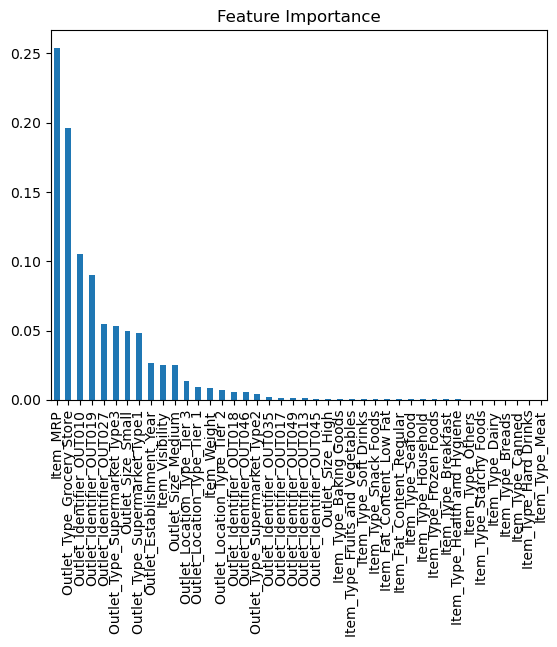

In [45]:
coef = pd.Series(rf.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

<AxesSubplot:title={'center':'Feature Importance'}>

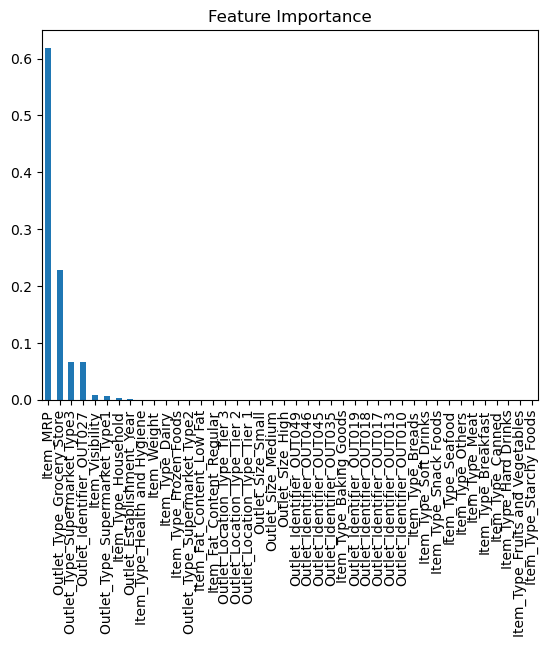

In [46]:
coef = pd.Series(ad.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

<AxesSubplot:title={'center':'Feature Importance'}>

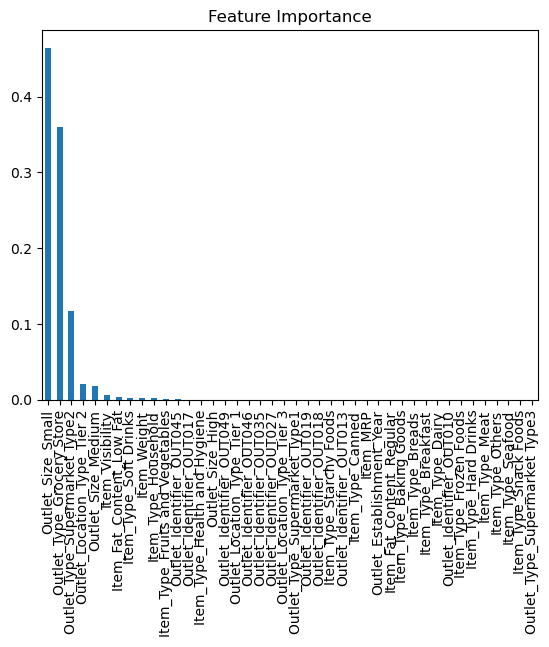

In [47]:
coef = pd.Series(DTR.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")